Collaborative coding using GitHub
===========

Damari Alicia Paredes García


# Collaborator 2: Description of tasks

• **Function scat_plt (var1, var2, groups):**

Given the variables var1 and var2, creates a scatterplot of the two variables, displaying the information given on groups using different colors (or symbols). That is, observations belonging to a given group 1 will be displayed on a given color, observations belonging to group 2 will be displayed with a different color and so on. var1 is displayed in the xaxis and var2 in the y-axis. The obtained plot should contain a legend displaying the information regarding to groups Inputs: var1 and var2: Two given variables of the same length groups: A variable the same size as var1 and var2 where the information regarding to group belonging is contained.

• **Based on the variable ‘name’ write some code in the main that creates two new columns in the dataframe**:

One displaying the subject id (S1, S2, S3…) and another displaying the trial (t1, t2, t3, …, t6 or t7 in some cases). Remover the column name from the dataframe.

• **Function normalize (df, op):**

Given a dataframe df, normalizes all variables according to the options in op. op can only take two values, 0 for normalizing the variables based on the z-score and 1 for normalizing the variables based on the min_max approach. The function returns a dataframe consisting on normalized variables. Be aware of avoiding normalizing variables that are supposed to be categorical, even if the type of such variables is not specifically categorical (that is, a variable can be of type numerical even when it represents categories) Inputs: df: A given dataframe op: numeric variable (either 0 or 1) Output norm_df: normalized dataframe



In [ ]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns

# This statement allow to display plots without asking to
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')

In [ ]:
# We will start by loading the parkinson dataset. The rest is up to you!
dex = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
dex.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Function 1: scat_plt (var1, var2, groups)

In [ ]:
# define the function

def scat_plt(var1, var2, groups):
  """
  Create a scatter plot using two variabels and their corresponding information about groups.

  Parameters:
  - var1: first varaible for X-axis
  - var2: second variable for Y-axis
  - groups: vector with same lenngth as var1 and var2 that contains information about groups to differentation of variables
  """

  # create a data frame with the variable selected
  data = {'var1':var1,'var2':var2, 'groups':groups}
  df = pd.DataFrame(data)

  # Obtain a vector with unique groups
  unique_groups = df['groups'].unique()

  fig, ax = plt.subplots()

  # Use the 'Dark2' colormap for coloring the groups
  colors = plt.cm.Dark2.colors

  for group in unique_groups:
      ax.scatter(df.loc[df['groups'] == group, 'var1'], df.loc[df['groups'] == group, 'var2'], color=colors[group], label=f'{group}')

  # Set original names of the variables
  ax.set_xlabel(var1.name)
  ax.set_ylabel(var2.name)

  # Place the legend on the right top outside the plot
  legend = ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
  # Add a title to the legend
  legend.set_title('Groups')

  plt.show()


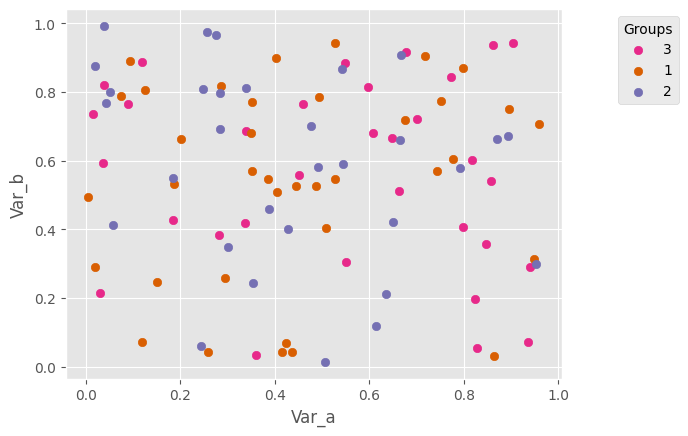

In [ ]:

# Example usage with a DataFrame
data = {'Var_a': np.random.rand(100), 'Var_b': np.random.rand(100), 'Groups_c': np.random.choice([1, 2, 3], size=100)}
df = pd.DataFrame(data)


scat_plt(df['Var_a'], df['Var_b'], df['Groups_c'])

## Split name

In [ ]:
split_name = dex.name.str.split('_',expand=True) # separate the string into segments using the character '_' as separator
                                         # It would create one column for each segment
#print('spliting the values in "name" yields the following data frame. The first two columns are useless')
#print(split_name.head()) # note that the first two columns are not relevant for our analisys so we can drop them
split_name.drop(split_name.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
split_name.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation
split_name

,subject_id,trial
0,S01,1
1,S01,2
2,S01,3
3,S01,4
4,S01,5
...,...,...
190,S50,2
191,S50,3
192,S50,4
193,S50,5


## Function: normalize (df, op)

In [71]:
# define the function

def normalize(df, op):
  """
  Create a function that normalizes variables of a given data frame depending on: op = 0 for Z-score and op = 1 for min_max approach.
  The function needs to avoid categorical variables.

  Parameters:
  - df: given data-frame
  - op: numerical variale (0 or 1), which indicates type of normalization

  Returns:
  - norm_df: normalize data-frame
  """

  #numeric_df = df._get_numeric_data()
  #numcols = list(numeric_df.columns)
  #allcols = list(df.columns)
  #a = list(numeric_df.columns)
  #b = list(df.columns)

  numeric_df = df.select_dtypes(include=np.number)
  #catcols = list(set(df.columns) - set(numeric_df.columns))

  # in this case we compare the unique values of numeric columns. If the number of unique elements are less than 5
  #(or whatever threshold we consider) then this column is potentially consider as categorical
  catcols = [col for col in df.columns if df[col].nunique() <= 5]
  #catcols = list(set(b)-set(a))

  if op == 0:  # Z-score normalization
      norm_df = (numeric_df - numeric_df.mean()) / numeric_df.std()
  elif op == 1:  # Min-max normalization
      norm_df = (numeric_df - numeric_df.min()) / (numeric_df.max() - numeric_df.min())

  norm_df[catcols] = df[catcols]

  return norm_df


In [69]:
# Example usage:
data = {'Var1': [10, 20, 30, 40, 50],
        'Var2': [1, 2, 3, 4, 5],
        'Category': ['C', 'B', 'A', 'C', 'A']}
df = pd.DataFrame(data)

# Choose normalization method (0 for z-score, 1 for min-max)
normalized_df_zscore = normalize(df, op=0)
normalized_df_minmax = normalize(df, op=1)

print("Original DataFrame:")
print(df)
print("\nZ-score Normalized DataFrame:")
print(normalized_df_zscore)
print("\nMin-max Normalized DataFrame:")
print(normalized_df_minmax)

Original DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A

Z-score Normalized DataFrame:
       Var1      Var2 Category
0 -1.264911 -1.264911        C
1 -0.632456 -0.632456        B
2  0.000000  0.000000        A
3  0.632456  0.632456        C
4  1.264911  1.264911        A

Min-max Normalized DataFrame:
   Var1  Var2 Category
0  0.00  0.00        C
1  0.25  0.25        B
2  0.50  0.50        A
3  0.75  0.75        C
4  1.00  1.00        A


In [72]:
# Example usage with a DataFrame
data = {'Var_a': np.random.rand(100), 'Var_b': np.random.rand(100), 'Groups_c': np.random.choice([1, 2, 3], size=100)}
df = pd.DataFrame(data)

# Choose normalization method (0 for z-score, 1 for min-max)
normalized_df_zscore = normalize(df, op=0)
normalized_df_minmax = normalize(df, op=1)

print("Original DataFrame:")
print(df)
print("\nZ-score Normalized DataFrame:")
print(normalized_df_zscore)
print("\nMin-max Normalized DataFrame:")
print(normalized_df_minmax)

Original DataFrame:
       Var_a     Var_b  Groups_c
0   0.113375  0.434365         1
1   0.645951  0.088921         2
2   0.223883  0.457327         2
3   0.502755  0.041885         1
4   0.917207  0.371654         2
..       ...       ...       ...
95  0.867385  0.888353         3
96  0.547976  0.090289         2
97  0.520019  0.253047         3
98  0.378039  0.566642         1
99  0.691453  0.658996         1

[100 rows x 3 columns]

Z-score Normalized DataFrame:
       Var_a     Var_b  Groups_c
0  -1.535154 -0.095998         1
1   0.361176 -1.322428         2
2  -1.141670 -0.014478         2
3  -0.148698 -1.489418         1
4   1.327028 -0.318643         2
..       ...       ...       ...
95  1.149630  1.515792         3
96  0.012320 -1.317569         2
97 -0.087227 -0.739730         3
98 -0.592772  0.373621         1
99  0.523195  0.701508         1

[100 rows x 3 columns]

Min-max Normalized DataFrame:
       Var_a     Var_b  Groups_c
0   0.110190  0.439949         1
1   0.648949